In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#Definicion de la clase
class HierarchicalClustering:
    def __init__(self, num_clusters):
        self.num_clusters = num_clusters
        self.clusters = None
        self.centroid = None

    def fit(self, data):
        n_samples, n_features = data.shape
        self.clusters =[[i] for i in range(n_samples) ]
        distance_matrix = np.linalg.norm(data[:, np.newaxis] - data, axis = 2)
        while len(self.clusters) > self.num_clusters:
            min_dist = np.inf
            pair = None
            for i in range(len(self.clusters)):
                for j in range(i+1, len(self.clusters)):
                    dist = np.min( distance_matrix[self.clusters[i],:][:, self.clusters[j]])
                    if dist < min_dist:
                        min_dist = dist
                        pair = ( i, j )
            i, j = pair
            self.clusters[i].extend(self.clusters[j])
            self.clusters.pop(j)
        self.centroid= np.array([np.mean(data[cluster], axis=0) for cluster in self.clusters])
    
    def predict(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroid, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels
    

In [28]:
from tqdm import tqdm
from time import sleep

for i in tqdm(range(10)):
    x, y= make_blobs(n_samples=100, centers=2, cluster_std= 0.95, random_state= 42)
    model = HierarchicalClustering( num_clusters=2)
    model.fit(x)
    # Tu código aquí
    sleep(0.2)  # Simula una operación

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:52<00:00,  5.21s/it]


In [36]:
labels_pred= model.predict(x)
#Reetiquetar cluster
def relabel_cluster(true_label, predicted_label):
    cm = confusion_matrix(true_label, predicted_label)
    relabeling = np.argmax(cm, axis=1)
    new_predicted_label= np.array([relabeling[label] for label in predicted_label])
    return new_predicted_label

In [37]:
y_pred= relabel_cluster(y, labels_pred)
report= classification_report(y, y_pred)
print(report ) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



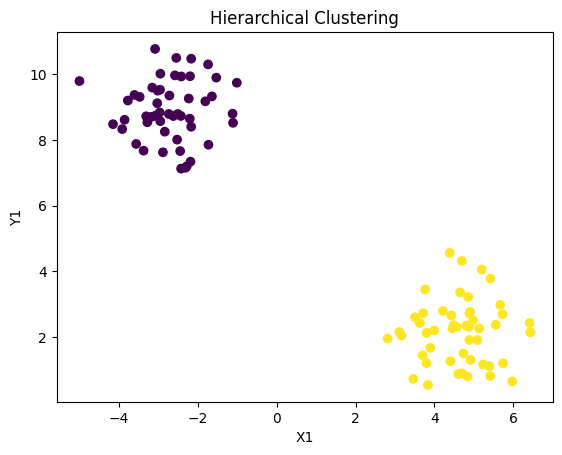

In [38]:
plt.title('Hierarchical Clustering')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.scatter(x[:, 0], x[:,1], c= labels_pred)
plt.show()